# Quantum Measurement

[![Download Notebook](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_notebook_en.svg)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/master/mindquantum/en/beginner/mindspore_quantum_measurement.ipynb)&emsp;
[![Download Code](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_download_code_en.svg)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/master/mindquantum/en/beginner/mindspore_quantum_measurement.py)&emsp;
[![View Source On Gitee](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_source_en.svg)](https://gitee.com/mindspore/docs/blob/master/docs/mindquantum/docs/source_en/beginner/quantum_measurement.ipynb)

## Overview

In the design of quantum circuits, we finally need to obtain the results through the measurement operation. When measuring, we need to select a specific ground state for measurement,  the measured results are uncertain, and the quantum state will also randomly collapse to at some ground state we measure.

Quantum measurement is described by a set of measurement operators ${M_m}$, these operators act on the state space of the system under test, the index $m$ represents the possible measurement results in the experiment, if before the measurement, the state of the quantum system is $ |\psi⟩$, then the probability of occurrence of the result $m$ is:

$$
p(m)=⟨\psi|M^\dagger_mM_m|\psi⟩
$$

The state collapse of the system after measurement is:

$$
\frac{M_m|\psi⟩}{\sqrt{⟨\psi|M^\dagger_mM_m|\psi⟩}}
$$

The measurement operator satisfies the completeness equation:

$$
\Sigma_mM^\dagger_mM_m=I
$$

The completeness equation expresses the fact that the probabilities sum to 1:

$$
1=\Sigma_m p(m)=\Sigma_m ⟨\psi|M^\dagger_mM_m|\psi⟩
$$

This equation holds for all $|\psi⟩$ and is equivalent to the completeness equation, but it is simpler to directly verify the completeness equation, so the completeness equation is used as a constraint.

According to the different measurement operators selected, our common measurements are divided into  computational basis measurement, projection measurement, Pauli measurement, etc. MindSpore Quantum provides a wealth of measurement functions and visual display tools, and we use these functions to further learn quantum measurement.

## Computational Basis Measurement

We first have a simple understanding of the calculation basis measurement: suppose there is a state of n qubits, we perform n-bit calculation basis measurement on it. After the measurement, if the result is $00 \cdots0$, it indicates that the quantum of the n-qubit system has collapsed to the $|00 \cdots0⟩$ state; similarly, if one of the qubits is measured, half of the $2^n$cases it represents are excluded, i.e. the measurement operation projects the quantum state onto one of the two halves of the space, indicating that a subsystem of the quantum state of the n-qubit system has collapsed.

### Single-qubit Measurement Under Computational Basis

Computational base measurement operators: $M_0=|0⟩⟨0|$ and $M_1=|1⟩⟨1|$, notice that each measurement operator is Hermite, that is, $M_0^\dagger=M_0, M_1^\dagger=M_1$, and $M^2_0=M_0, M^2_1=M_1$, so the completeness relation is satisfied:

$$
I=M^\dagger_0M_0+M^\dagger_1M_1=M_0+M_1
$$

Assuming that the measured state $|\psi⟩=a|0⟩+b|1⟩$, the probability of obtaining the measurement result 0 is:

$$
\begin{align*}
p(0)&=⟨\psi|M^\dagger_0M_0|\psi⟩\\
&=⟨\psi|M_0|\psi⟩\\
&=⟨\psi|(|0⟩⟨0|)|\psi⟩\\
&=(⟨\psi|0⟩)(⟨0|\psi⟩)\\
&=[(⟨0|a^{\star}+⟨1|b^{\star})|0⟩][⟨0|(a|0⟩+b|1⟩)]\\
&=(a^{\star}⟨0|0⟩+b^{\star}⟨1|0⟩)(a⟨0|0⟩+b⟨1|0⟩)\\
&=a^{\star}a\\
&=|a|^2
\end{align*}
$$

Similarly, the probability of obtaining measurement 1 is $p(1)=|b|^2$. In both cases, the measured states are:

$$
\begin{align*}
\frac{M_0|\psi⟩}{|a|}=\frac{a}{|a|}|0⟩\\
\frac{M_1|\psi⟩}{|b|}=\frac{b}{|b|}|1⟩\\
\end{align*}
$$

### Measurement of Multiple Qubits Under the Computational Base - Taking Two Qubits as An Example

#### Measure All Bits in the System

Computational basis measurement operator in two-qubit system: $M_{00}=|00⟩⟨00|, M_{01}=|01⟩⟨01|, M_{10}=|10⟩⟨10|$ and $ M_{11}=|11⟩⟨11|$. Notice that each measurement operator is Hermite, that is, it satisfies $M_{ij}^\dagger=M_{ij},i,j\in\{0, 1\}$, and $M_{ij}^2=M_{ij}$, so the completeness relation is satisfied:

$$
I=M^\dagger_{00}M_{00}+M^\dagger_{01}M_{01}+M^\dagger_{10}M_{10}+M^\dagger_{11}M_{11}= M_{00}+M_{01}+M_{10}+M_{11}
$$

Assuming that the measured state $|\psi⟩=a|00⟩+b|01⟩+c|10⟩+d|11⟩$, the probability of obtaining the measurement result 00 is:

$$
\begin{align*}
p(00)&=⟨\psi|M^\dagger_{00}M_{00}|\psi⟩\\
&=⟨\psi|M_{00}|\psi⟩\\
&=⟨\psi|(|00⟩⟨00|)|\psi⟩\\
&=(⟨\psi|00⟩)(⟨00|\psi⟩)\\
&=[(⟨00|a^{\star}+⟨01|b^{\star}+⟨10|c^{\star}+⟨11|d^{\star})|00⟩][⟨00|(a|00⟩+b|01⟩+c|10⟩+d|11⟩)]\\
&=(a^{\star}⟨00|00⟩+b^{\star}⟨01|00⟩+c^{\star}⟨10|00⟩+d^{\star}⟨11|00⟩)(a⟨00|00⟩+b⟨00|01⟩+c⟨00|10⟩+b⟨00|11⟩)\\
&=a^{\star}a\\
&=|a|^2
\end{align*}
$$

Similarly, the probability of obtaining measurement 01 is $p(01)=|b|^2$, the probability of 10 is $p(10)=|c|^2$, and the probability of 11 is $p(11)= |d|^2$. In the four cases, the states after measurement are:

$$
\begin{align*}
\frac{M_{00}|\psi⟩}{|a|}=\frac{a}{|a|}|00⟩\\
\frac{M_{01}|\psi⟩}{|b|}=\frac{b}{|b|}|01⟩\\
\frac{M_{10}|\psi⟩}{|c|}=\frac{c}{|c|}|10⟩\\
\frac{M_{11}|\psi⟩}{|d|}=\frac{d}{|d|}|11⟩\\
\end{align*}
$$

#### Measuring a Single Qubit in the System

Measuring the first qubit of a two-qubit quantum state, the two-computational basis measurement operator: $M_0=|0⟩⟨0|\otimes I$ and $M_1=|1⟩⟨1|\otimes I$. Notice that Each measurement operator is Hermite, that is, it satisfies $M_0^\dagger=M_0, M_1^\dagger=M_1$, and $M^2_0=M_0, M^2_1=M_1$, so it satisfies the completeness relation:

$$
I=M^\dagger_0M_0+M^\dagger_1M_1=M_0+M_1
$$

Assuming that the measured state $|\psi⟩=a|00⟩+b|01⟩+c|10⟩+d|11⟩$, then measure the first qubit of the two-qubit quantum state, and obtain the measurement result of 0 The probability is:

$$
\begin{align*}
p(0)&=⟨\psi|M^\dagger_0M_0|\psi⟩\\
&=⟨\psi|M_0|\psi⟩\\
&=⟨\psi|(|0⟩⟨0|\otimes I)|\psi⟩\\
&=(⟨00|a^{\star}+⟨01|b^{\star}+⟨10|c^{\star}+⟨11|d^{\star})|(|0⟩⟨0|\otimes I)|(a|00⟩+b|01⟩+c|10⟩+d|11⟩)\\
&=(⟨00|a^{\star}+⟨01|b^{\star}+⟨10|c^{\star}+⟨11|d^{\star})|(a|00⟩+b|01⟩)\\
&=a^{\star}a+b^{\star}b\\
&=|a|^2+|b|^2
\end{align*}
$$

Similarly, the probability of getting measurement 1 is $p(1)=|c|^2+|d|^2$. In both cases, the measured states are:

$$
\begin{align*}
\frac{M_0|\psi⟩}{\sqrt{|a|^2+|b|^2}}=\frac{a}{\sqrt{|a|^2+|b|^2}}|00⟩+\frac{b}{\sqrt{|a|^2+|b|^2}}|01⟩\\
\frac{M_1|\psi⟩}{\sqrt{|c|^2+|d|^2}}=\frac{c}{\sqrt{|c|^2+|d|^2}}|10⟩+\frac{d}{\sqrt{|c|^2+|d|^2}}|11⟩\\
\end{align*}
$$

Through the study of computation-based measurements, we can intuitively realize that making a measurement on one of the bits of a multi-qubit state essentially projects the quantum state into one of the two subspaces. To distinguish these two subspaces concisely, we use our knowledge of linear algebra to know that two orthogonal subspaces can be described by matrices with exactly two unique eigenvalues.

### MindSpore Quantum Implementation for Computational Base Measurements

Next, we use MindSpore Quantum to build a quantum circuit with measurement operations and observe the results. First, import the modules that this tutorial depends on.

In [1]:
import numpy as np                           # Import the numpy library and abbreviate to np
from mindquantum.core.gates import X, H      # Import quantum gate H, X
from mindquantum.simulator import Simulator  # Import the Simulator class from mindquantum. simulator
from mindquantum.core.circuit import Circuit # Import the Circuit module for building quantum circuits
from mindquantum.core.gates import Measure   # Import measurement gate

Description:

(1) Numpy is a powerful Python library, mainly used to perform calculations on multi-dimensional arrays, supports a large number of dimensional array and matrix operations, and also provides a large number of mathematical function libraries for array operations;

(2) MindSpore Quantum is a quantum-classical hybrid computing framework that supports the training and reasoning of various quantum neural networks;

(3) The quantum gate to be executed in the built quantum circuit needs to be imported from the [mindquantum.core](https://www.mindspore.cn/mindquantum/docs/en/master/mindquantum.core.html) module;

(4) The quantum simulator required to run the quantum circuit needs to be imported from the [mindquantum.simulator](https://www.mindspore.cn/mindquantum/docs/en/master/mindquantum.simulator.html) module;

(5) The quantum circuit class [Circuit](https://www.mindspore.cn/mindquantum/docs/en/master/core/circuit/mindquantum.core.circuit.Circuit.html) required to build a quantum circuit needs to be imported from the [mindquantum.core](https://www.mindspore.cn/mindquantum/docs/en/master/mindquantum.core.html) module;

(6) To measure the quantum circuit, we need to import the [measure](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.Measure.html) operation from MindSpore Quantum.

We build a quantum circuit that prepares a two-qubit uniform superposition state $|\psi⟩=\frac{\sqrt{2}(|00⟩+|11⟩)}{2}$, and show it separately for the results of using the computational base measurement on all qubits and using the computational base measurement only on qubit 0.

#### MindSpore Quantum Implements Measuring All Qubits in the System

Before using the code demonstration, let's simply calculate the theoretical value.

Use the computational basis to measure $|\psi⟩=\frac{\sqrt{2}(|00⟩+|11⟩)}{2}$ on all qubits:

$$
\begin{align*}
p(00)&=|a|^2=(\frac{\sqrt{2}}{{2}})^2=\frac{1}{2}\\
p(01)&=|b|^2=0^2=0\\
p(10)&=|c|^2=0^2=0\\
p(11)&=|d|^2=(\frac{\sqrt{2}}{{2}})^2=\frac{1}{2}\\
\end{align*}
$$

It can be seen that there are only two possibilities for the measurement result: 00 and 11, and the probability is $\frac{1}{2}$. The states after measurement are:

$$
\begin{align*}
\frac{a}{|a|}|00⟩=|00⟩\\
\frac{d}{|d|}|11⟩=|11⟩\\
\end{align*}
$$

We start building a quantum circuit that prepares $|\psi⟩=\frac{\sqrt{2}(|00⟩+|11⟩)}{2}$ and measures all bits:

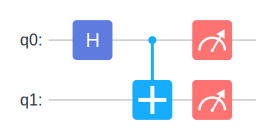

In [2]:
circ_all = Circuit()             # Initialize the quantum circuit
circ_all += H.on(0)              # The H gate acts on qubit 0
circ_all += X.on(1, 0)           # The X gate acts on qubit 1 and is controlled by qubit 0
circ_all += Measure('q0').on(0)  # Apply a measurement on qubit 0 and name this measurement 'q0'
circ_all += Measure('q1').on(1)  # Apply a measurement to qubit 1 and name this measurement 'q1'
circ_all.svg()                   # Draw a quantum circuit picture in SVG format

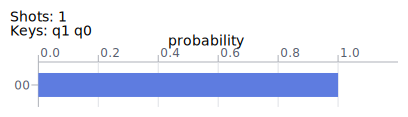

In [3]:
sim = Simulator('mqvector', 2)     #Declare a 2-bit mqvector emulator
sim.apply_circuit(circ_all).svg()  # Run the quantum circuit on the simulator

It can be seen that the measurement result we get is '11' (this result can be '00', since the measurement is random), and the quantum state after measurement collapses to:

In [4]:
print(sim.get_qs(True))

1¦00⟩


The quantum state collapses to $1|11⟩$, which is consistent with the theoretical value.

If we measure a few more times, we can find that the measurement result will also be '00', please execute multiple times to see different result:

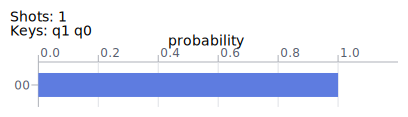

In [5]:
sim.reset()                        # Reset simulator
sim.apply_circuit(circ_all).svg()  # Run the quantum circuit on the simulator

Printing out the quantum state at this time, we can see that it collapses into the corresponding $|00⟩$:

In [6]:
print(sim.get_qs(True))

1¦00⟩


We observe that the results are sometimes '00' and sometimes '11', which is in line with the theoretical expectation, but there is no way to observe whether the probabilities of 00 and 11 are the same. We hope to make multiple measurements and count the frequency of different results, so as to see whether the results meet the expected probability distribution. For this purpose, we use the quantum line Sampling function:

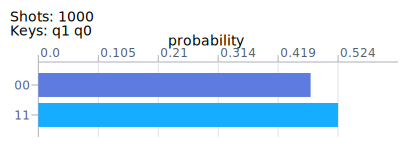

In [7]:
sim.reset()
result = sim.sampling(circ_all, shots=1000)  # Sample the circuit defined above 1000 times
result.svg()

We can see that in the sampling 1000, '00' appears 476 times, and '11' appears 524 times (those value may change when you executer the cell). The sampling result conforms to the probability distribution, and the slight error is caused by the noise of the simulator. Students who read it carefully can find that in the [Quantum Simulator Tutorial](https://mindspore.cn/mindquantum/docs/en/master/beginner/quantum_simulator.html), we have shown the sampling results of this circuit, but the reason for the distribution of the results is not explained. After learning the computation based measurement in this tutorial, we believe that you have a deeper understanding of the distribution of the results.

#### MindSpore Quantum Implements Measurement of a Single Bit in the System

Again, let's simply calculate the theoretical value before using the code to demonstrate it.

Using the computational basis to measure $|\psi⟩=\frac{\sqrt{2}(|00⟩+|11⟩)}{2}$ on qubit 0:

$$
\begin{align*}
p(0)=|a|^2+|b|^2=(\frac{\sqrt{2}}{{2}})^2=\frac{1}{2}\\
p(1)=|c|^2+|d|^2=(\frac{\sqrt{2}}{{2}})^2=\frac{1}{2}\\
\end{align*}
$$

It can be seen that there are two possibilities for the measurement result: 0 and 1, and the probability is $\frac{1}{2}$. The states after measurement are:

$$
\begin{align*}
\frac{a}{\sqrt{|a|^2+|b|^2}}|00⟩+\frac{b}{\sqrt{|a|^2+|b|^2}}|01⟩=|00⟩\\
\frac{c}{\sqrt{|c|^2+|d|^2}}|10⟩+\frac{d}{\sqrt{|c|^2+|d|^2}}|11⟩=|11⟩\\
\end{align*}
$$

We start to build a quantum circuit that prepares $|\psi⟩=\frac{\sqrt{2}(|00⟩+|11⟩)}{2}$ and measures on qubit 0:

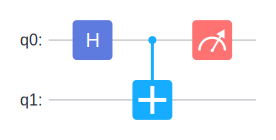

In [8]:
circ_partial = Circuit()             # Initialize the quantum circuit
circ_partial += H.on(0)              # The H gate acts on qubit 0
circ_partial += X.on(1, 0)           # The X gate acts on qubit 1 and is controlled by qubit 0
circ_partial += Measure('q0').on(0)  # Apply a measurement on qubit 0 and name this measurement 'q0'
circ_partial.svg()                   # Draw a quantum circuit picture in SVG format

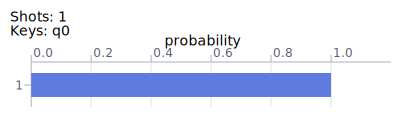

In [9]:
sim.reset()                            # Reset simulator
sim.apply_circuit(circ_partial).svg()  # Run the quantum circuit on the simulator

It can be seen that the measurement result we get is '1' (this can also be '0' when you execute the cell), and the quantum state after measurement collapses to:

In [10]:
print(sim.get_qs(True))

1¦11⟩


The quantum state collapses to $1|11⟩$, which is consistent with the theoretical value.

Similarly, if we measure a few more times, we can find that the measurement result will also be '0', which will not be demonstrated here. We directly sample 1000 observations of this quantum circuit:

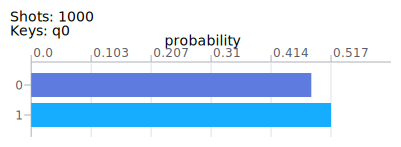

In [11]:
sim.reset()
result = sim.sampling(circ_partial, shots=1000)  #Sample the circuit defined above 1000 times
result.svg()

We can see that in sampling 1000, '0' appears 483 times and '1' appears 517 times (those values may change when you execute the cell). The sampling result conforms to the probability distribution, and the slight error is caused by the noise of the simulator.

We have completed the study of quantum computational based measurement, and then we enter the study of another measurement operation: projection measurement.

## Projection Measurement

Projection measurement is described by an observable Hermite operator $M$ on the state space of the observed system ($M=M^{\dagger}$), which has a spectral decomposition:

$$
M=\Sigma_{m}mP_m
$$

Here $P_m$ is the projection on the feature space corresponding to the eigenvalue $m$ of $m$, and the possible results of the measurement correspond to the eigenvalue $m$ of the measurement operator. When measuring the state $|\psi⟩$, the probability of getting the result $m$ is

$$
p(m)=⟨\psi|P_m|\psi⟩
$$

The state of the quantum system immediately after the measurement is:

$$
\frac{P_m|\psi⟩}{\sqrt{p(m)}}
$$

The intuitive explanation is that we use the $M$ projection measurement for the state $|\psi⟩$, which is to project $|\psi⟩$ onto the feature space of $M$, and project the probability of $p_m$ to the space $V_{ m}$, at this time the measurement result is the eigenvalue $m$ corresponding to the space.

An important feature of projection measurement is that it is easy to calculate the expected value of projection measurement $E(M)$.

$$
\begin{align*}
    E(M) &=\Sigma_i \lambda_i p_i\\
         &=\Sigma_i \lambda_i⟨\psi|P_i|\psi⟩\\
         &=⟨\psi|(\Sigma_i\lambda_i P_i)|\psi⟩\\
         &=⟨\psi|M|\psi⟩
\end{align*}
$$

Projection measurement can be regarded as a special case of general measurement. When the measurement operator not only satisfies the completeness relation $\Sigma_mM_m^\dagger M_m=I$, but also satisfies the condition that $M_m$ is an orthogonal projection operator, that is, $M_m$ is Hermite, and

$$
M_mM_{m'}=\delta_{mm'}M_m
$$

With these additional constraints, general measurement degenerates into projection measurement.

## Pauli Measurement

Finally, we learn the Pauli measurement. Pauli measurement is a projection measurement that selects the observable $M$ as the Pauli operator. Taking the Pauli-Z measurement as an example, we consider the Z operator:

$$
Z=
\left(
    \begin{array}{l}
    1&0\\
    0&-1
    \end{array}
\right)
$$

It can be seen that Z satisfies $Z=Z^\dagger$, that is, Z is Hermite. Z has two eigenvalues +1, -1, and the corresponding eigenvectors are: |0⟩ and |1⟩. Therefore, the spectral decomposition form of Z is:

$$
Z=\left(
    \begin{array}{l}
    1&0\\
    0&-1
    \end{array}
\right)=1\times|0⟩⟨0|+(-1)\times|1⟩⟨1|
$$

Using Z to do projection measurement, if the measurement result is +1, we can conclude that the state of the qubit is projected into the +1 eigensubspace $V_{+1}$ of the Z operator, indicating that the measured state is projected as and |0⟩, similarly, if the measurement result is -1, it can be concluded that the qubit is projected into the -1 eigensubspace $V_{-1}$, indicating that the measured state is projected to be |1⟩, This is known as the Pauli-Z measurement.

MindSpore Quantum provides us with the ability to calculate the expected value of a projected measurement based on a given observable H:

[get_expectation(hamiltonian)](https://www.mindspore.cn/mindquantum/docs/en/master/simulator/mindquantum.simulator.Simulator.html#mindquantum.simulator.Simulator.get_expectation) can calculate the expected value of the current quantum state of the simulator with respect to an observed quantity: $E=⟨\psi|H|\psi⟩$. **This operation does not change the quantum state**.

For example, we wish to apply a Pauli-Z measurement to the q1 qubit on a system in the state $\frac{\sqrt{2}}{2}|00⟩+\frac{\sqrt{2}}{2}|11⟩$, first we set the simulator:

In [12]:
sim = Simulator('mqvector', 2)                        # Declare a 2-bit mqvector simulator
sim.set_qs(np.array([2**0.5 / 2, 0, 0, 2**0.5 / 2]))  # Setting simulator State
print(sim.get_qs())

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


Then we construct the Hamiltonian hams corresponding to Pauli-Z measurement on q1:

In [13]:
from mindquantum.core.operators import Hamiltonian    # Import Hamiltonian definition module
from mindquantum.core.operators import QubitOperator  # Import sparse operator definition module

hams = Hamiltonian(QubitOperator('Z1'))               # Construct the Hamiltonian for Pauli-Z measurement on q1

In order to deeply understand and learn the Pauli-Z measurement operation, we first manually calculate the expected value of the current quantum state of the simulator to perform the Pauli-Z measurement on q1, and calculate the probability that the measurement result is +1, -1:

$$
\begin{align*}
E&=⟨\psi|H|\psi⟩\\&=
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}& 0& 0& \frac{\sqrt{2}}{2}
    \end{array}
\right) \times
(Z \otimes I) \times
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}\\
    0\\
    0\\
    \frac{\sqrt{2}}{2}
    \end{array}
\right) \\&=
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}& 0& 0& \frac{\sqrt{2}}{2}
    \end{array}
\right) \times
\left(
    \begin{array}{l}
    1&0\\
    0&-1\\
    \end{array}
\right) \otimes
\left(
\begin{array}{l}
    1&0\\
    0&1\\
\end{array}
\right)
\times
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}\\
    0\\
    0\\
    \frac{\sqrt{2}}{2}
    \end{array}
\right) \\&=
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}& 0& 0& \frac{\sqrt{2}}{2}
    \end{array}
\right) \times
\left(
    \begin{array}{l}
    1&0&0&0\\
    0&1&0&0\\
    0&0&-1&0\\
    0&0&0&-1
    \end{array}
\right)
\times
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}\\
    0\\
    0\\
    \frac{\sqrt{2}}{2}
    \end{array}
\right) \\&=
0\\
&=1\times p(1)+(-1)\times p(-1)\\
&=1\times p(1)+(-1)\times (1-p(1))\\
&=p(1)-1+p(-1)\\
\Longrightarrow&p(1)=p(-1)=0.5
\end{align*}
$$

This means that the theoretical expectation value of the measurement is 0, and the probability of measuring +1 and -1 is 50%. We use the [get_expectation()](https://www.mindspore.cn/mindquantum/docs/en/master/simulator/mindquantum.simulator.Simulator.html#mindquantum.simulator.Simulator.get_expectation) provided by MindSpore Quantum to verify the result:

In [14]:
# Calculate the expected value of the current quantum state of the simulator with respect to Hams
sim.get_expectation(hams)

0j

As you can see, the result of the manual calculation and the calculation using [get_expectation(hamiltonian)](https://www.mindspore.cn/mindquantum/docs/en/master/simulator/mindquantum.simulator.Simulator.html#mindquantum.simulator.Simulator.get_expectation) is the same, as expected.

We can also act on both the q0 and q1 qubits on the system in the $\frac{\sqrt{2}}{2}|00⟩+\frac{\sqrt{2}}{2}|11⟩$ state Pauli-Z measurement. Similarly, the Hamiltonian hams2 corresponding to Pauli-Z measurement on q0, q1 is constructed:

In [15]:
# Construct the Hamiltonian for Pauli-Z measurements on q0, q1
hams2 = Hamiltonian(QubitOperator('Z0') + QubitOperator('Z1'))

We can also manually calculate the expected value of the Pauli-Z measurement of the current quantum state of the simulator on q0, q1:

$$
\begin{align*}
E&=⟨\psi|H|\psi⟩\\&=
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}& 0& 0& \frac{\sqrt{2}}{2}
    \end{array}
\right) \times
(Z \otimes I) \times
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}\\
    0\\
    0\\
    \frac{\sqrt{2}}{2}
    \end{array}
\right)
+
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}& 0& 0& \frac{\sqrt{2}}{2}
    \end{array}
\right) \times
(I \otimes Z) \times
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}\\
    0\\
    0\\
    \frac{\sqrt{2}}{2}
    \end{array}
\right) \\&=
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}& 0& 0& \frac{\sqrt{2}}{2}
    \end{array}
\right) \times
\left(
    \begin{array}{l}
    1&0\\
    0&-1\\
    \end{array}
\right) \otimes
\left(
\begin{array}{l}
    1&0\\
    0&1\\
\end{array}
\right)
\times
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}\\
    0\\
    0\\
    \frac{\sqrt{2}}{2}
    \end{array}
\right)
+
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}& 0& 0& \frac{\sqrt{2}}{2}
    \end{array}
\right) \times
\left(
    \begin{array}{l}
    1&0\\
    0&1\\
    \end{array}
\right) \otimes
\left(
\begin{array}{l}
    1&0\\
    0&-1\\
\end{array}
\right)
\times
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}\\
    0\\
    0\\
    \frac{\sqrt{2}}{2}
    \end{array}
\right) \\&=
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}& 0& 0& \frac{\sqrt{2}}{2}
    \end{array}
\right) \times
\left(
    \begin{array}{l}
    1&0&0&0\\
    0&1&0&0\\
    0&0&-1&0\\
    0&0&0&-1
    \end{array}
\right)
\times
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}\\
    0\\
    0\\
    \frac{\sqrt{2}}{2}
    \end{array}
\right)
+
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}& 0& 0& \frac{\sqrt{2}}{2}
    \end{array}
\right) \times
\left(
    \begin{array}{l}
    1&0&0&0\\
    0&-1&0&0\\
    0&0&1&0\\
    0&0&0&-1
    \end{array}
\right)
\times
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}\\
    0\\
    0\\
    \frac{\sqrt{2}}{2}
    \end{array}
\right) \\&=
0+0 \\
&=0
\end{align*}
$$

In [16]:
sim.set_qs(np.array([2**0.5 / 2, 0, 0, 2**0.5 / 2]))  # Set simulator state

# Calculate the expected value of the simulator current quantum state about hams2
sim.get_expectation(hams2)

0j

This operation does not change the quantum state, we look at the current quantum state:

In [17]:
sim.get_qs()

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

It can be found that the quantum state is still the original set $\frac{\sqrt{2}}{2}|00⟩+\frac{\sqrt{2}}{2}|11⟩$

We learned to recognize an important operation in quantum computing - measurement, used MindSpore Quantum to measure quantum circuits to verify our theoretical results, and used different visualization tools to display the measurement results.

To learn higher-level operations on quantum circuits in MindSpore Quantum, build and train quantum-classical hybrid neural networks, see the documentation for [get_expectation_with_grad()](https://www.mindspore.cn/mindquantum/docs/en/master/simulator/mindquantum.simulator.Simulator.html#mindquantum.simulator.Simulator.get_expectation_with_grad) and [apply_hamiltonian()](https://www.mindspore.cn/mindquantum/docs/en/master/simulator/mindquantum.simulator.Simulator.html#mindquantum.simulator.Simulator.apply_hamiltonian).

In [18]:
from mindquantum.utils.show_info import InfoTable

InfoTable('mindquantum', 'scipy', 'numpy')

Software,Version
mindquantum,0.9.11
scipy,1.10.1
numpy,1.23.5
System,Info
Python,3.9.16
OS,Linux x86_64
Memory,8.3 GB
CPU Max Thread,8
Date,Sat Dec 30 23:26:48 2023
